In [1]:
import numpy as np
import pandas as pd

import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv('data.csv')
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
len(cars)

11914

# Initial Data Preparation

Convert column names to lower case, remove spaces for ease of use

In [3]:
cars.columns = cars.columns.str.lower().str.replace(' ', '_')

In Pandas, strings are represented by ndarray objects. So dtype of string columns are 'object'. See below.

In [4]:
cars.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

We need to do the same process for all strings in the dataframe. Convert to lower case and add _ in place of spaces

In [5]:
string_cols = list(cars.dtypes[cars.dtypes == 'object'].index)
string_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in string_cols:
    cars[col] = cars[col].str.lower().str.replace(' ', '_')

In [7]:
cars.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

Distribution of prices

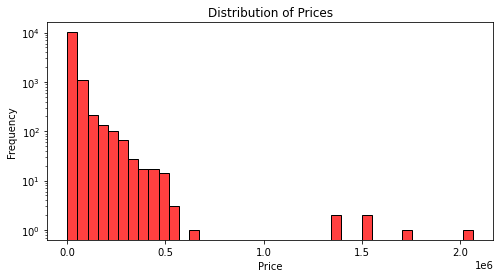

In [42]:
plt.figure(figsize=(8,4))

seaborn.histplot(cars.msrp, bins=40, color="red")
plt.ylabel("Frequency")
plt.xlabel("Price")
ax = plt.gca()
ax.set_yscale('log')
plt.title("Distribution of Prices")

plt.show()

Removing Outliers and doing a non-logarithmic analysis, to observe a better spread

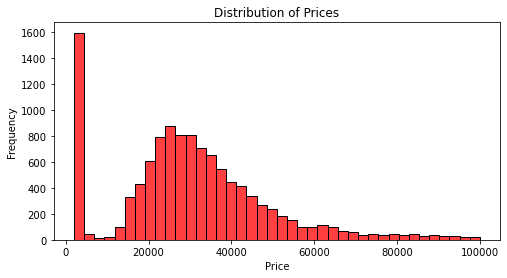

In [48]:
plt.figure(figsize=(8,4))

seaborn.histplot(cars.loc[(cars.msrp < 100000), 'msrp'], bins=40, color="red")
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.title("Distribution of Prices")

plt.show()

Log transformation of prices

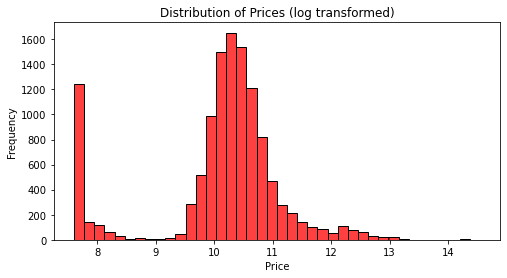

In [49]:
plt.figure(figsize=(8,4))

log_prices = np.log(cars.msrp)
seaborn.histplot(log_prices, bins=40, color="red")
plt.ylabel("Frequency")
plt.xlabel("log(Price)")
plt.title("Distribution of Prices (log transformed)")

plt.show()

Checking the null values

In [51]:
cars.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Validation framework

In [55]:
np.random.seed(123)

n = len(cars)

#Split in sets - 60-20-20
n_validation = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_validation + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
print(idx)

[ 2839  7553 10214 ...  1346 11646  3582]


In [56]:
cars_shuffled = cars.iloc[idx]

In [57]:
cars_train = cars_shuffled.iloc[:n_train].copy()
cars_test = cars_shuffled.iloc[n_train:n_train+n_test].copy()
cars_validation = cars_shuffled.iloc[n_train+n_test:].copy()

Separating target variable from the features, in both log and original forms.

In [58]:
y_train_orig = cars_train.msrp.values
y_val_orig = cars_validation.msrp.values
y_test_orig = cars_test.msrp.values

y_train = np.log(cars_train.msrp.values)
y_val = np.log(cars_validation.msrp.values)
y_test = np.log(cars_test.msrp.values)

del cars_train['msrp']
del cars_validation['msrp']
del cars_test['msrp']

In [59]:
cars_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
7924,infiniti,qx50,2016,premium_unleaded_(recommended),325.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,190
2348,cadillac,catera,2000,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,23,16,1624
1501,cadillac,ats_coupe,2015,premium_unleaded_(recommended),272.0,4.0,automatic,all_wheel_drive,2.0,"luxury,performance",compact,coupe,29,20,1624
11524,bmw,x6_m,2016,premium_unleaded_(required),567.0,8.0,automatic,all_wheel_drive,4.0,"crossover,factory_tuner,luxury,high-performance",midsize,4dr_suv,19,14,3916
1992,pontiac,bonneville,2005,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,18,210


# Linear Regression

In [66]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  
    # The column of ones is added for adding the constant term to linear regression. 
    # Weights of 1 will be calculated in the process. w0 * 1 = w0

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]